In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../Data/cleaned_cc_data.csv')
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


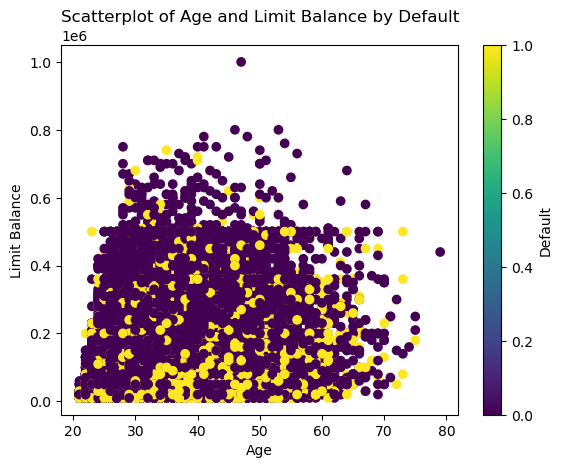

In [4]:
plt.scatter(df['AGE'], df['LIMIT_BAL'], c=df['default.payment.next.month'])
plt.xlabel('Age')
plt.ylabel('Limit Balance')
plt.title('Scatterplot of Age and Limit Balance by Default')
plt.colorbar(label='Default')
plt.show()


/var/folders/_8/vwqz873x1nqfqy7ffnk43r080000gn/T/ipykernel_77113/1485767839.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(pd.cut(df['LIMIT_BAL'], bins=range(0, 1000001, 50000)))['default.payment.next.month'].sum().plot(kind='bar')


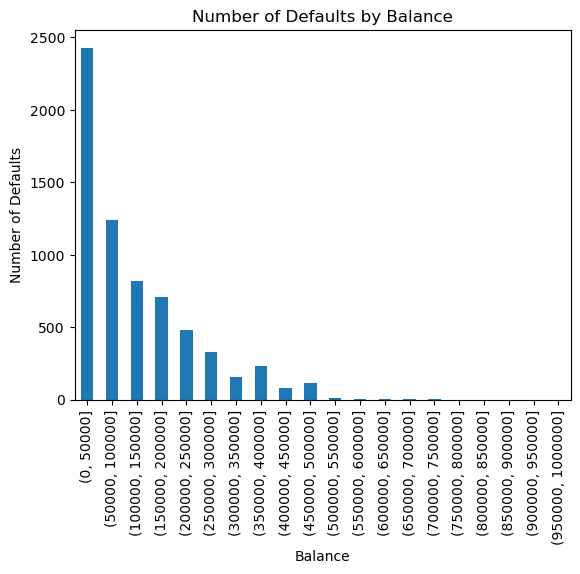

In [ ]:
df.groupby(pd.cut(df['LIMIT_BAL'], bins=range(0, 1000001, 50000)))['default.payment.next.month'].sum().plot(kind='bar')
plt.xlabel('Balance')
plt.ylabel('Number of Defaults')
plt.title('Number of Defaults by Balance')
plt.show()


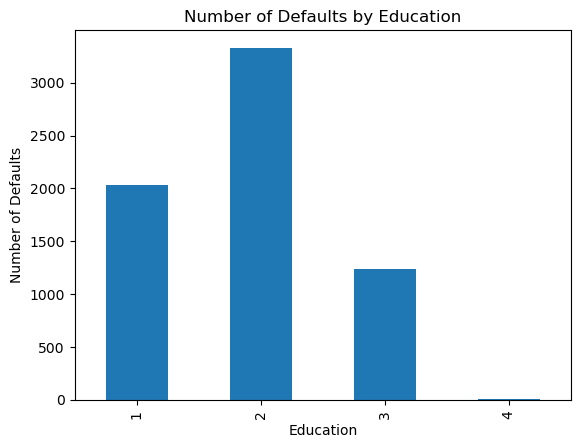

In [ ]:
df.groupby('EDUCATION')['default.payment.next.month'].sum().plot(kind='bar')
plt.xlabel('Education')
plt.ylabel('Number of Defaults')
plt.title('Number of Defaults by Education')
plt.show()



/var/folders/_8/vwqz873x1nqfqy7ffnk43r080000gn/T/ipykernel_77113/2415000260.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  defaults_by_age = df.groupby('Age_Decade')['default.payment.next.month'].sum()


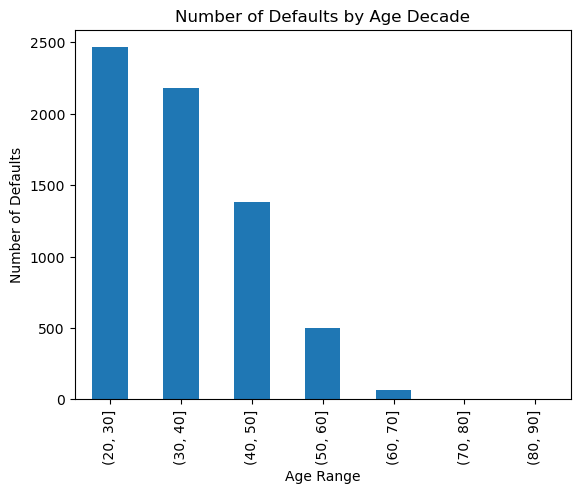

In [ ]:
# Group the data by age decades and count the number of defaults.
df['Age_Decade'] = pd.cut(df['AGE'], bins=[20, 30, 40, 50, 60, 70, 80, 90])
defaults_by_age = df.groupby('Age_Decade')['default.payment.next.month'].sum()

# Plot the bar chart
defaults_by_age.plot(kind='bar')
plt.xlabel('Age Range')
plt.ylabel('Number of Defaults')
plt.title('Number of Defaults by Age Decade')
plt.show()


In [ ]:
# Import SKLearn
from sklearn.model_selection import train_test_split

# Scale the data
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets
X = df.copy().drop('default.payment.next.month', axis=1)

# Create target Dataframe, y
y = df['default.payment.next.month']

# Test, Train, Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=24)

# Create the scaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform
X_train = scaler.fit_transform(X_train)

# Transform the test set
X_test = scaler.transform(X_test)




In [ ]:
# Import the model
from sklearn.linear_model import LogisticRegression

# Create the model
model = LogisticRegression()

# Fit the model
model.fit(X_train, y_train)

# Predict the probability of default
y_pred = model.predict(X_test)



In [ ]:
# Import the metrics
from sklearn.metrics import roc_auc_score

# Calculate the ROC score
roc_auc_score(y_test, y_pred)

0.6007907271911396